In [2]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv("USArrests.csv",index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


### Model 

In [7]:
kmeans = KMeans(n_clusters=4)

In [9]:
print(kmeans)

KMeans(n_clusters=4)


In [10]:
kmeans = kmeans.fit(df)

kmeans.fit(X, y=None, sample_weight=None)

Compute k-means clustering.

In [11]:
kmeans.n_clusters

4

In [13]:
# Centers of Clusters for each feature
kmeans.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [14]:
# Which urban in whick class
kmeans.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [15]:
df['Label'] = kmeans.labels_

**Model Tuning**

Optimization of Cluster Numbers: Finding Minimum Error 

We want high similarity(Max) inside clusters and low similarity interclusters(Min) to find omtimized sum of squared error(SSR).

In [31]:
kmeans.inertia_

float

In [46]:
df.drop('Label',axis=1).head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [67]:
SSR = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(df)
    SSR.append(kmeans.inertia_)   

In [68]:
SSR = pd.DataFrame(SSR,columns=['SSR'])

In [69]:
SSR.index = list(range(2,20))


In [70]:
SSR.head()

,SSR
2,96434.266240
3,47984.265357
4,34728.629357
5,24417.023524
6,18768.000667


(1.0, 20.0)

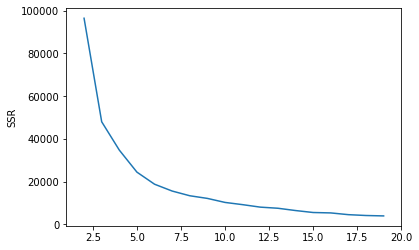

In [95]:
sns.lineplot(x=SSR.index,y=SSR['SSR'])
plt.xlim((1,20))

We find that K = 6 can do a good model.